# SBML interpolation
`sbmlutils` provides functionality for creating interpolated functions in SBML models. This allows to drive the model with experimental data sets. 

## Dataset
In a first step an experimental data set is loaded as a `pandas` DataFrame.

In [1]:
%matplotlib inline

     x    y      z
0  0.0  0.0  10.00
1  1.0  2.0   5.00
2  2.0  1.0   2.50
3  3.0  1.5   1.25
4  4.0  2.5   0.60
5  5.0  3.5   0.30


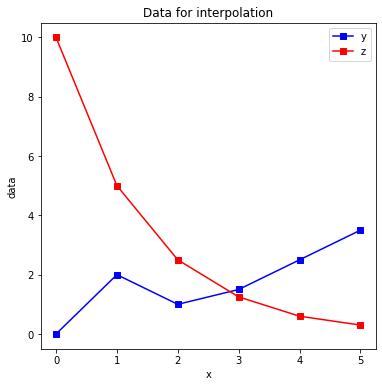

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# load dataset
data = pd.read_csv('./data/interpolation/data1.tsv', sep='\t')
print(data)

# plot data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.plot(data['x'], data['y'], '-s', label="y", color="blue")
ax.plot(data['x'], data['z'], '-s', label="z", color="red")
ax.set_title("Data for interpolation")
ax.set_xlabel('x')
ax.set_ylabel('data')

ax.legend()
plt.show()

## Interpolate data
Now we interpolate the experimental data with different methods and
write the resulting SBML models with the interpolation functions.

In [3]:
# import the interpolation functionality
from sbmlutils.manipulation.interpolation import *
import os
if not os.path.exists('tmp'):
    os.mkdir('tmp')

# constant interpolation
ip_constant = Interpolation(data=data, method=INTERPOLATION_CONSTANT)
ip_constant.write_sbml_to_file("./tmp/data1_constant.xml")

# linear interpolation
ip_linear = Interpolation(data=data, method=INTERPOLATION_LINEAR)
ip_linear.write_sbml_to_file("./tmp/data1_linear.xml")

# natural cubic spline
ip_cubic = Interpolation(data=data, method=INTERPOLATION_CUBIC_SPLINE)
ip_cubic.write_sbml_to_file("./tmp/data1_cubic.xml")

─────────────────────────────────────── Validate SBML ───────────────────────────────────────

<SBMLDocument>
valid                    : TRUE
check time (s)           : 0.003

─────────────────────────────────────────────────────────────────────────────────────────────

─────────────────────────────────────── Validate SBML ───────────────────────────────────────

<SBMLDocument>
valid                    : TRUE
check time (s)           : 0.004

─────────────────────────────────────────────────────────────────────────────────────────────

─────────────────────────────────────── Validate SBML ───────────────────────────────────────

<SBMLDocument>
valid                    : TRUE
check time (s)           : 0.007

─────────────────────────────────────────────────────────────────────────────────────────────

## Simulate
In the next step we can use the interpolation SBML models for simulation.

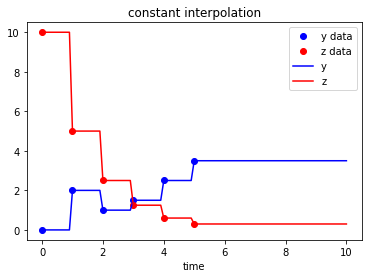

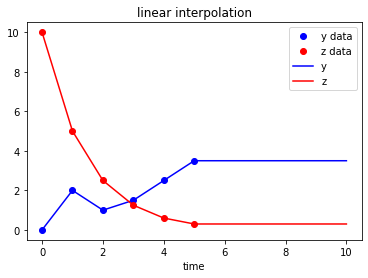

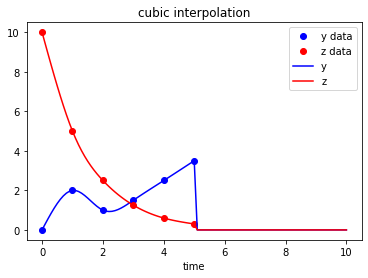

In [4]:
# simulate
def plot_data(s, name):
    """ Helper function for plotting interpolation with data. """
    from matplotlib import pyplot as plt
    plt.plot(data['x'], data['y'], 'o', label="y data", color="blue")
    plt.plot(data['x'], data['z'], 'o', label="z data", color="red")
    plt.plot(s['time'], s['y'], '-', label="y", color="blue")
    plt.plot(s['time'], s['z'], '-', label="z", color="red")
    plt.xlabel('time')
    plt.title('{} interpolation'.format(name))
    plt.legend()

import roadrunner
for name in ['constant', 'linear', 'cubic']:
    sbml_file = './tmp/data1_{}.xml'.format(name)
    r = roadrunner.RoadRunner(sbml_file)
    
    # Simulate the interpolation
    r.timeCourseSelections = ['time', 'y', 'z']
    s = r.simulate(0,10,steps=100)
    # print(s)

    plot_data(s, name=name)
    plt.show()